In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
x = iris['data'][:,(2,3)]
y = iris['target']

setosa_or_versicolor = (y==0) | (y==1)
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]
svm_clf = SVC(kernel='linear',C=float('inf'))
svm_clf.fit(x,y)

SVC(C=inf, kernel='linear')

In [4]:
x0 = np.linspace(0,5.5,200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5

def plot_svc_bd(svm_clf,start,end,sv=True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(start,end,200)
    #决策边界绘制
    decision_bd = -w[0]/w[1]*x0 -b/w[1]
    margin = 1/w[1]
    up = decision_bd + margin
    down = decision_bd - margin
    plt.plot(x0,decision_bd,'k-',linewidth=2)
    plt.plot(x0,up,'k--',linewidth=2)
    plt.plot(x0,down,'k--',linewidth=2)


    if(sv == True):
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FAA')

(0.0, 5.5, 0.0, 2.0)

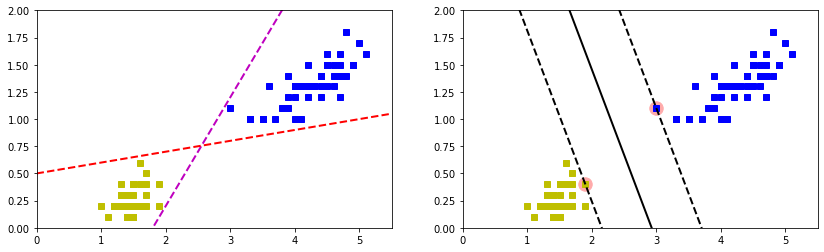

In [7]:
plt.figure(figsize=(14,4))
plt.subplot(121)

# iris数据集
plt.plot(x[:,0][y==1],x[:,1][y==1],'bs')
plt.plot(x[:,0][y==0],x[:,1][y==0],'ys')

#分割边界
# plt.plot(x0,pred_1,'g--',linewidth=2)
plt.plot(x0,pred_2,'m--',linewidth=2)
plt.plot(x0,pred_3,'r--',linewidth=2)
plt.axis([0,5.5,0,2])
plt.subplot(122)

#决策边界
plt.plot(x[:,0][y==1],x[:,1][y==1],'bs')
plt.plot(x[:,0][y==0],x[:,1][y==0],'ys')
plot_svc_bd(svm_clf,0,5.5)
plt.axis([0,5.5,0,2])